In [1]:
import pickle
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
images = pickle.load( open( "images_1116851.pkl", "rb" ) )

## Needed containertree to load this
# images = pickle.load( open( "metadata_1116851.pkl", "rb" ) )

In [3]:
## Most common file types were c and h, so let's just use those for now.
chars = ['c', 'h']

In [177]:
## Make a dict mapping file types to data from those files
D = {c:[] for c in chars}
for k in images:
    ext = k.split('/')[-1].split('.')[-1]
    if ext in D:
        D[ext].append(images[k])

In [178]:
## Train/test split, across files
train_test_div = 0.7

In [179]:
## Split D into train and test parts
num_train = {c: int(len(D[c]) * train_test_div) for c in chars} 
D_train = {c : D[c][:num_train[c]] for c  in chars}
D_test = {c : D[c][num_train[c]:] for c  in chars}

In [182]:
def pad_a(a, size = (80,80), const = 32):
    """Pad an array to a certain size with const value (32 are spaces).
    """
    assert len(size) == len(a.shape)
    for i in range(len(size)):
        assert a.shape[i] <= size[i]
        
    a_new = np.ones(size) * const
    a_new[:a.shape[0], :a.shape[1]] = a
    return a_new

In [ ]:
## Convert file type categories to numbers as well
char_to_num = {'c' : 0, 'h' : 1}

In [204]:
def add_pads(D, length_cutoff = 30, padding_length = 80, verbose=True):
    """Pad data to 80x80 size, or toss it out if it's too short.
    """
    for c in chars:
        D_c_new = []
        for j in range(len(D[c])):
            l = D[c][j]
            l_new = []
            for i in range(len(l)):
                if l[i].shape[0] > length_cutoff:
                    if l[i].shape[0] < padding_length:
                        l_new.append(pad_a(l[i]))
                    else:
                        l_new.append(l[i])
            if len(l_new) > 0:
                D_c_new.append(l_new) 
        if len(D_c_new) > 0:
            D[c] = D_c_new
    return D

In [185]:
D_test = add_pads(D_test)
D_train = add_pads(D_train)

In [205]:
def make_input_data(D_current, v=False): 
    """Generate inputs and outputs."""
    x = []
    y = []
    for c in chars:
        data_for_c = np.concatenate([np.array(a) for a in D_current[c]])
        x.append(data_for_c)
        if v:
            print("data size with of extension %s: %s" % (c, len(data_for_c)) )
        y += [char_to_num[c]]*len(data_for_c)
    x = np.concatenate(x)
    y = np.array(y)
    return x, y

In [187]:
x_train, y_train = make_input_data(D_train)

In [188]:
x_test, y_test = make_input_data(D_test)

In [189]:
x_train.shape

(489, 80, 80)

In [190]:
y_train.shape

(489,)

In [191]:
x_test.shape

(201, 80, 80)

In [192]:
y_test.shape

(201,)

## What do .C files look like?

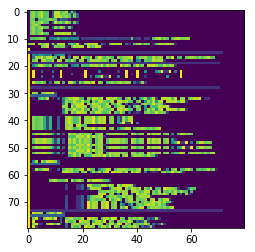

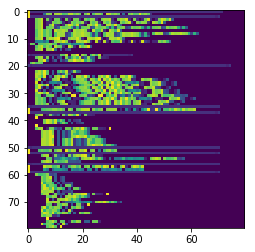

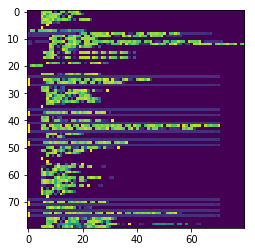

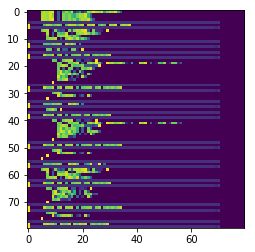

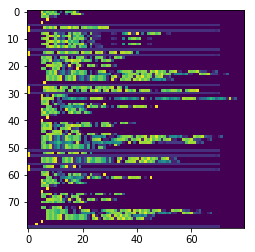

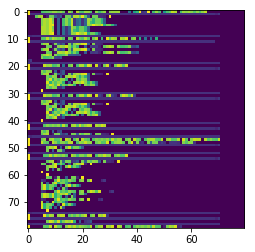

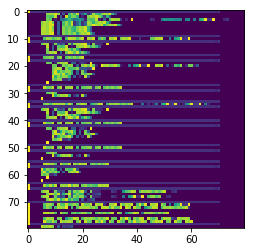

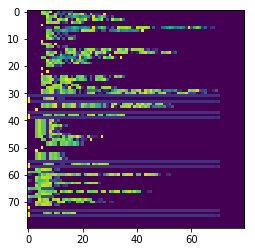

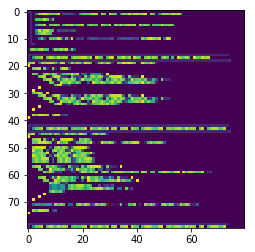

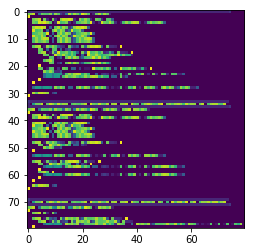

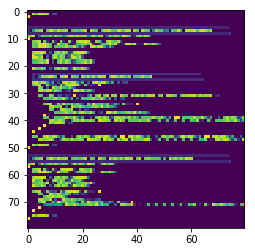

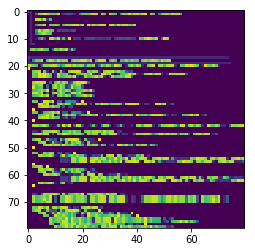

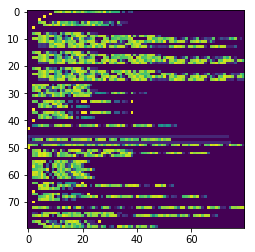

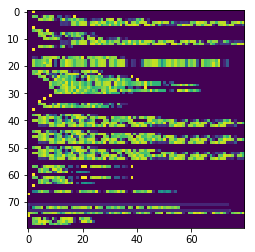

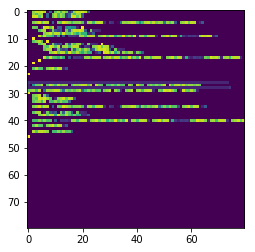

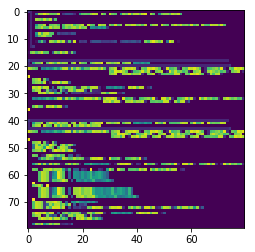

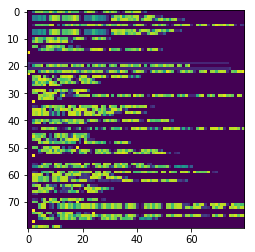

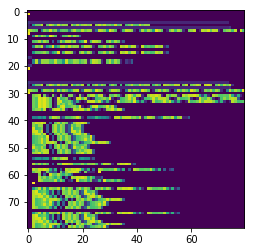

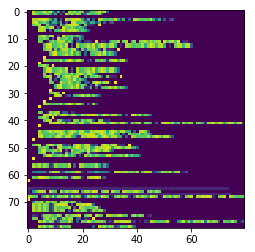

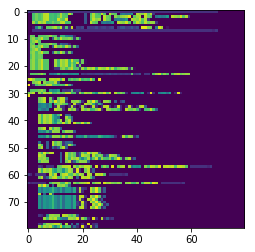

In [193]:
for i in range(20):
    plt.imshow(x_train[i])
    plt.show()

## What do .h files look like?

In [200]:
num_c = len(np.concatenate([np.array(a) for a in D_train['c']]))

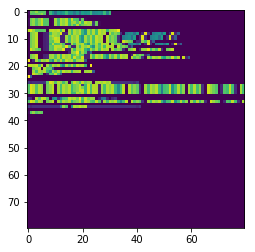

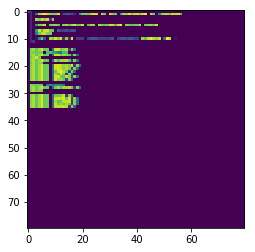

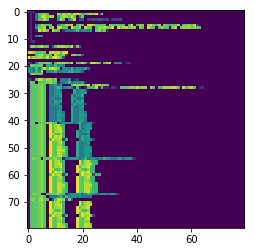

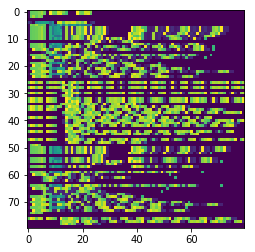

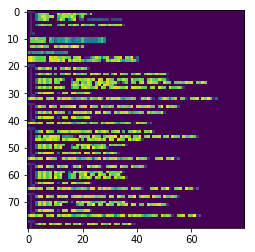

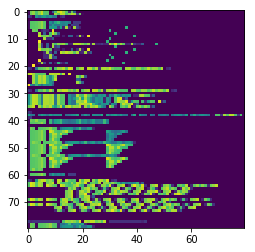

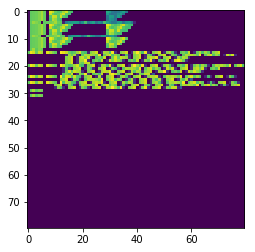

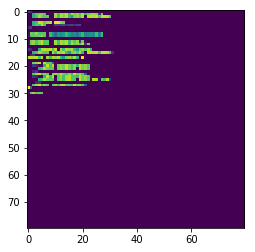

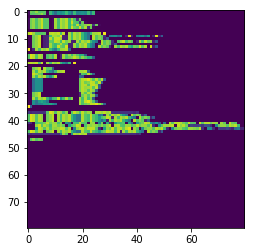

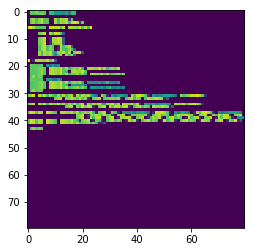

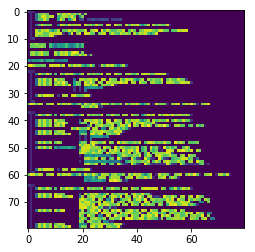

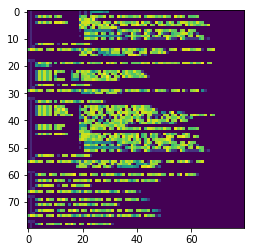

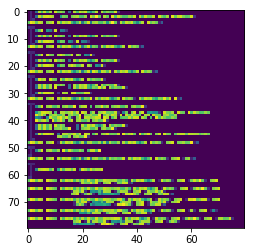

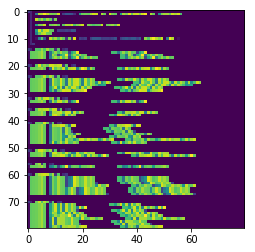

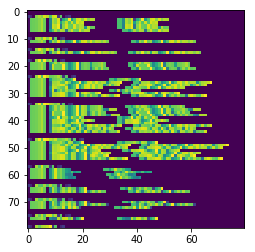

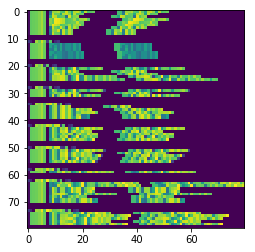

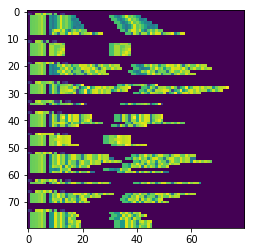

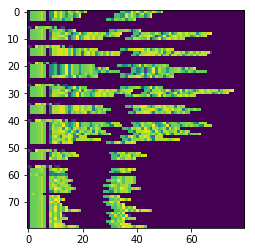

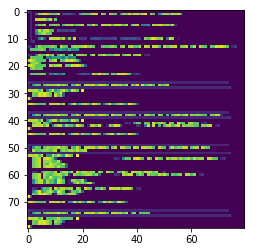

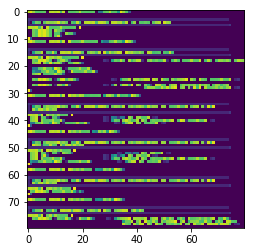

In [201]:
for i in range(num_c, num_c+20):
    plt.imshow(x_train[i])
    plt.show()